# 다음 분기에 어떤 게임을 설계해야 할까

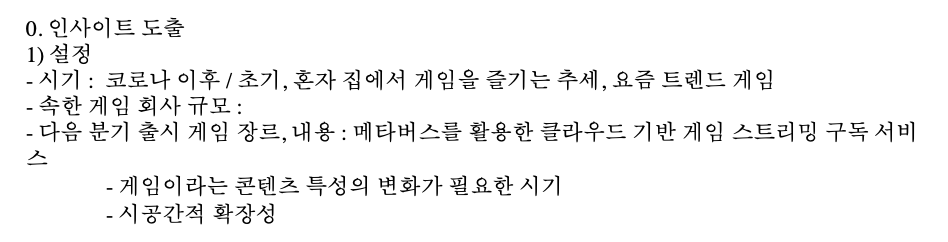

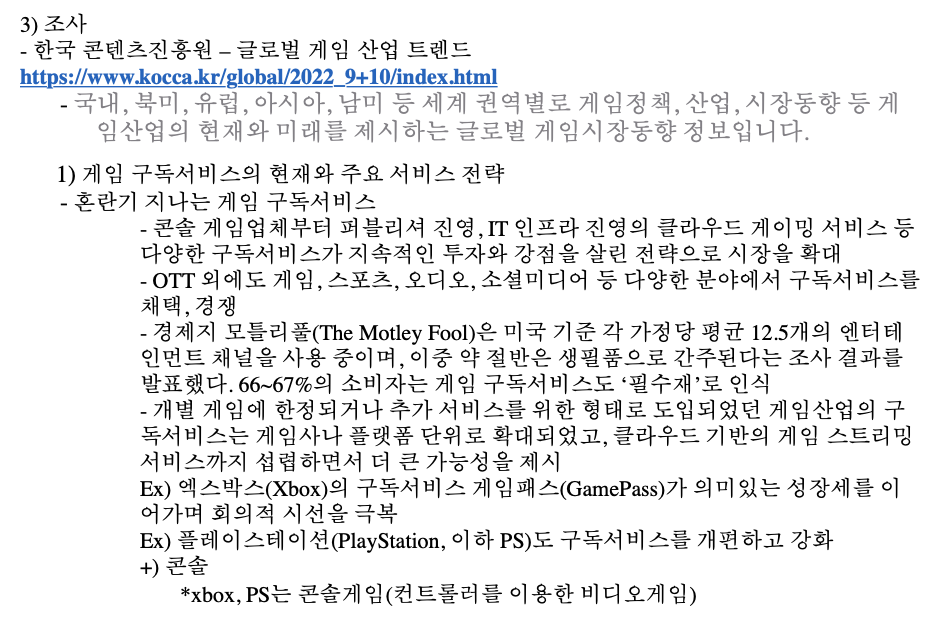

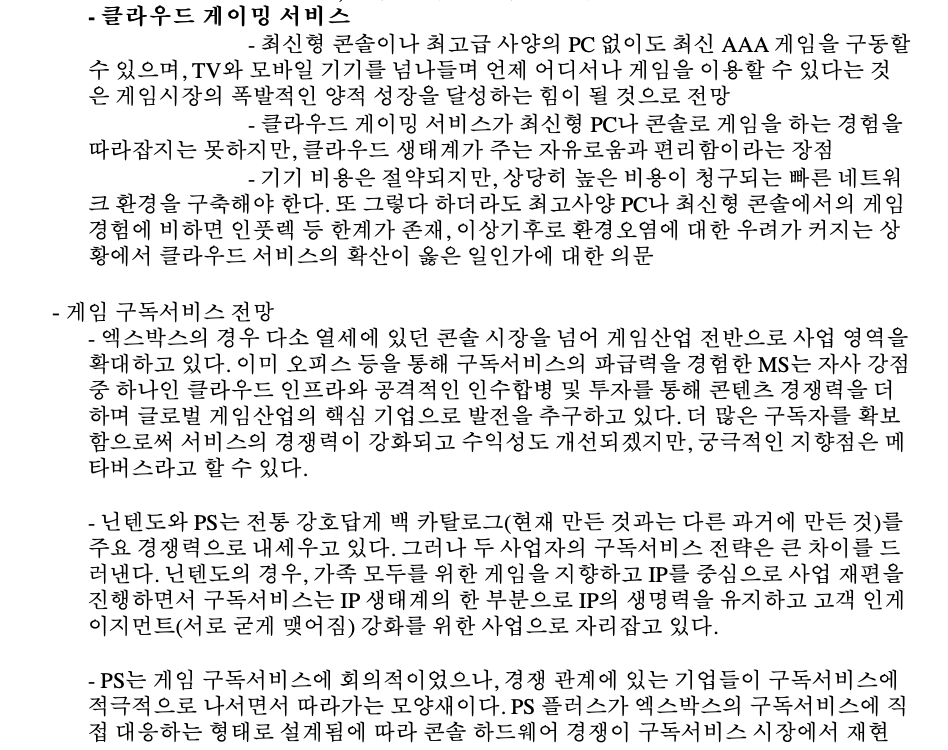

In [2]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


## 0.데이터 EDA

In [4]:
df_vgames = pd.read_csv('vgames2.csv')
df = df_vgames.copy()
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df = df.drop(df.columns[0], axis=1) # Unnamed: 0 column 삭제
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
df.shape

(16598, 9)

## 1.데이터 전처리


### 1-1) 중복 데이터

In [8]:
# 중복 데이터 확인
df[df.duplicated(keep=False)] # keep=False : 중복된 값 모두 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0,0,0.02,0


In [9]:
# 중복 데이터 제거
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(16597, 9)

### 1-2) 결측치

#### Genre

##### Genre 결측치 확인

In [10]:
# Genre
Genre_null = df[df.Genre.isnull()]
Genre_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1971,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2043,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2497,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3353,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [11]:
Genre_null.shape

(50, 9)

In [12]:
Genre_null_name = Genre_null.Name
Genre_null_name.duplicated().sum() 

0

In [13]:
Genre_null_name

50                          Ape Escape: On the Loose
408                                      NBA Ballers
1328                                      NFL Street
1582                  SingStar Singalong With Disney
1971                             Pokemon X/Pokemon Y
2043                                   NASCAR Racing
2497                Jurassic Park III: Island Attack
3353                     The Godfather: Dons Edition
3363                    Ski-Doo Snowmobile Challenge
3470              Batman Beyond: Return of the Joker
3515        Princess Saver! Eternal Love for My Lady
3932                               MVP Baseball 2004
4148                             Grand Theft Auto IV
4349                       Brain Quest: Grades 5 & 6
4545               Dragon Ball Z: Ultimate Tenkaichi
4598                                       Wii Party
4935                                Astonishia Story
5668                                    Chrono Cross
5713                    Back to the Future: Th

In [14]:
for name in Genre_null_name:
  tup = np.where(df['Name'] == name)  # tuple로 값 반환
  print(tup)          # tuple -> array로 변환

(array([50]),)
(array([ 408, 3337]),)
(array([ 1328,  4953, 13483]),)
(array([1582]),)
(array([1971]),)
(array([2043]),)
(array([2497]),)
(array([3353]),)
(array([ 3363,  8383, 14896]),)
(array([3470, 5172]),)
(array([3515]),)
(array([  917,  3932, 16059]),)
(array([ 4148, 13925, 16474]),)
(array([4349]),)
(array([4545, 8434]),)
(array([4598]),)
(array([4935]),)
(array([5668]),)
(array([ 1210,  2686,  3584,  5713, 16056]),)
(array([5945]),)
(array([6798]),)
(array([7143]),)
(array([ 2595,  3795,  7336, 13293, 16277]),)
(array([7526]),)
(array([7797]),)
(array([9487]),)
(array([10431, 12772, 16210]),)
(array([10500]),)
(array([10873, 16531]),)
(array([11049]),)
(array([11062]),)
(array([ 3505,  4990,  5050, 11267, 13064]),)
(array([11495]),)
(array([ 6608, 11667, 15008]),)
(array([11002, 11698, 12234]),)
(array([ 6181, 12313]),)
(array([12330]),)
(array([12339]),)
(array([12869]),)
(array([12981]),)
(array([13347]),)
(array([ 1047,  7183, 13206, 14064, 14929]),)
(array([15076]),)
(array

##### Genre 결측치 직접 확인 후, 대입

In [15]:
df.loc[[50]] # 1 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05


In [16]:
df.loc[[408, 3337]] # 2 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
3337,NBA Ballers,PS2,2004.0,Sports,Midway Games,0.81,0.63,0,0.21


In [17]:
list = [408, 3337]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Sports'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
408,NBA Ballers,XB,2004.0,Sports,Midway Games,0.37,0.11,0,0.02
3337,NBA Ballers,PS2,2004.0,Sports,Midway Games,0.81,0.63,0,0.21


In [18]:
df.loc[[1328,  4953, 13483]] # 3 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
4953,NFL Street,PS2,2004.0,Sports,Electronic Arts,1.15,0.08,0,0.19
13483,NFL Street,GC,2004.0,Sports,Electronic Arts,0.27,0.07,0,0.01


In [19]:
list = [1328,  4953, 13483]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Sports'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1328,NFL Street,XB,2004.0,Sports,Electronic Arts,0.49,0.15,0,0.02
4953,NFL Street,PS2,2004.0,Sports,Electronic Arts,1.15,0.08,0,0.19
13483,NFL Street,GC,2004.0,Sports,Electronic Arts,0.27,0.07,0,0.01


In [20]:
df.loc[[1582]] # 4 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1582,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57


In [21]:
df.loc[[3363,  8383, 14896]] # 9 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
8383,Ski-Doo Snowmobile Challenge,Wii,2009.0,Racing,Valcon Games,0.08,0,0,0.01
14896,Ski-Doo Snowmobile Challenge,PS3,2009.0,Racing,PQube,0.1,0,0,0.01


In [22]:
list = [3363,  8383, 14896]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Racing'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3363,Ski-Doo Snowmobile Challenge,X360,2009.0,Racing,Valcon Games,0.03,0,0,0
8383,Ski-Doo Snowmobile Challenge,Wii,2009.0,Racing,Valcon Games,0.08,0,0,0.01
14896,Ski-Doo Snowmobile Challenge,PS3,2009.0,Racing,PQube,0.1,0,0,0.01


In [23]:
df.loc[[3470, 5172]] # 10 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3470,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0
5172,Batman Beyond: Return of the Joker,PS,2000.0,Action,Ubisoft,0.09,0.06,0,0.01


In [24]:
list = [3470, 5172]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Action'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3470,Batman Beyond: Return of the Joker,N64,2000.0,Action,Ubisoft,0.07,0.02,0,0
5172,Batman Beyond: Return of the Joker,PS,2000.0,Action,Ubisoft,0.09,0.06,0,0.01


In [25]:
df.loc[[917,  3932, 16059]] # 12 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
917,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
3932,MVP Baseball 2004,PS2,2004.0,NaN,Electronic Arts,1.1,0.06,0,0.18
16059,MVP Baseball 2004,XB,2004.0,Sports,Electronic Arts,0.44,0.13,0,0.02


In [26]:
list = [917,  3932, 16059]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Sports'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
917,MVP Baseball 2004,GC,2004.0,Sports,Electronic Arts,0.2,0.05,0,0.01
3932,MVP Baseball 2004,PS2,2004.0,Sports,Electronic Arts,1.1,0.06,0,0.18
16059,MVP Baseball 2004,XB,2004.0,Sports,Electronic Arts,0.44,0.13,0,0.02


In [27]:
df.loc[[4148, 13925, 16474]] # 13 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4148,Grand Theft Auto IV,PC,2008.0,NaN,Take-Two Interactive,0.01,0.79,0,0.08
13925,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.1,0.14,1.03
16474,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62


In [28]:
list = [4148, 13925, 16474]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Action'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4148,Grand Theft Auto IV,PC,2008.0,Action,Take-Two Interactive,0.01,0.79,0,0.08
13925,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.1,0.14,1.03
16474,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62


In [29]:
df.loc[[4545, 8434]] # 15 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,NaN,Namco Bandai Games,0.39,0.1,0.01,0.04
8434,Dragon Ball Z: Ultimate Tenkaichi,PS3,2011.0,Fighting,Namco Bandai Games,0.27,0.18,0.09,0.08


In [30]:
list = [4545, 8434]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Fighting'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4545,Dragon Ball Z: Ultimate Tenkaichi,X360,2011.0,Fighting,Namco Bandai Games,0.39,0.1,0.01,0.04
8434,Dragon Ball Z: Ultimate Tenkaichi,PS3,2011.0,Fighting,Namco Bandai Games,0.27,0.18,0.09,0.08


In [31]:
df.loc[[1210,  2686,  3584,  5713, 16056]] # 19 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1210,Back to the Future: The Game,PS3,2011.0,Adventure,Telltale Games,0.07,0.01,0,0.01
2686,Back to the Future: The Game,PS4,2015.0,Adventure,Telltale Games,0.1,0.04,0,0.03
3584,Back to the Future: The Game,X360,2015.0,Adventure,Telltale Games,0.02,0.01,0,0
5713,Back to the Future: The Game,XOne,2015.0,NaN,Telltale Games,0,0.02,0,0
16056,Back to the Future: The Game,Wii,2011.0,Adventure,Telltale Games,0.05,0,0,0


In [32]:
list = [1210,  2686,  3584,  5713, 16056]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Adventure'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1210,Back to the Future: The Game,PS3,2011.0,Adventure,Telltale Games,0.07,0.01,0,0.01
2686,Back to the Future: The Game,PS4,2015.0,Adventure,Telltale Games,0.1,0.04,0,0.03
3584,Back to the Future: The Game,X360,2015.0,Adventure,Telltale Games,0.02,0.01,0,0
5713,Back to the Future: The Game,XOne,2015.0,Adventure,Telltale Games,0,0.02,0,0
16056,Back to the Future: The Game,Wii,2011.0,Adventure,Telltale Games,0.05,0,0,0


In [33]:
df.loc[[2595,  3795,  7336, 13293, 16277]] # 23 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2595,Madden NFL 11,X360,2010.0,Sports,Electronic Arts,2.38,0.12,0,0.18
3795,Madden NFL 11,PSP,2010.0,Sports,Electronic Arts,0.35,0,0,0.03
7336,Madden NFL 11,PS2,2010.0,NaN,Electronic Arts,0.41,0.02,0,0.07
13293,Madden NFL 11,PS3,2010.0,Sports,Electronic Arts,2.04,0.15,0,0.19
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K


In [34]:
list = [2595,  3795,  7336, 13293, 16277]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Sports'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2595,Madden NFL 11,X360,2010.0,Sports,Electronic Arts,2.38,0.12,0,0.18
3795,Madden NFL 11,PSP,2010.0,Sports,Electronic Arts,0.35,0,0,0.03
7336,Madden NFL 11,PS2,2010.0,Sports,Electronic Arts,0.41,0.02,0,0.07
13293,Madden NFL 11,PS3,2010.0,Sports,Electronic Arts,2.04,0.15,0,0.19
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K


In [35]:
df.loc[[10431, 12772, 16210]] # 27

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10431,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,NaN,Vivendi Games,0.08,0,0,0.01
12772,The Mummy: Tomb of the Dragon Emperor,DS,2008.0,Action,Vivendi Games,0.08,0,0,0.01
16210,The Mummy: Tomb of the Dragon Emperor,PS2,2008.0,Action,Vivendi Games,0.12,0.1,0,0.03


In [36]:
list = [10431, 12772, 16210]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Action'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10431,The Mummy: Tomb of the Dragon Emperor,Wii,2008.0,Action,Vivendi Games,0.08,0,0,0.01
12772,The Mummy: Tomb of the Dragon Emperor,DS,2008.0,Action,Vivendi Games,0.08,0,0,0.01
16210,The Mummy: Tomb of the Dragon Emperor,PS2,2008.0,Action,Vivendi Games,0.12,0.1,0,0.03


In [37]:
df.loc[[10873, 16531]] # 29 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10873,Karaoke Revolution Glee: Volume 3,Wii,2011.0,NaN,Konami Digital Entertainment,0.24,0.04,0,0.02
16531,Karaoke Revolution Glee: Volume 3,X360,2011.0,Misc,Konami Digital Entertainment,0.13,0,0,0.01


In [38]:
list = [10873, 16531]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Misc'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10873,Karaoke Revolution Glee: Volume 3,Wii,2011.0,Misc,Konami Digital Entertainment,0.24,0.04,0,0.02
16531,Karaoke Revolution Glee: Volume 3,X360,2011.0,Misc,Konami Digital Entertainment,0.13,0,0,0.01


In [39]:
df.loc[[3505,  4990,  5050, 11267, 13064]] # 32

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3505,Cloudy With a Chance of Meatballs,X360,2009.0,Platform,Ubisoft,0.07,0.01,0,0.01
4990,Cloudy With a Chance of Meatballs,PSP,2009.0,Platform,Ubisoft,0.07,0,0,0.01
5050,Cloudy With a Chance of Meatballs,DS,2009.0,Platform,Ubisoft,0.2,0.01,0,20K
11267,Cloudy With a Chance of Meatballs,PS3,2009.0,NaN,Ubisoft,0.09,0.01,0,0.01
13064,Cloudy With a Chance of Meatballs,Wii,2009.0,Platform,Ubisoft,0.11,0,0,0.01


In [40]:
list = [3505,  4990,  5050, 11267, 13064]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Platform'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3505,Cloudy With a Chance of Meatballs,X360,2009.0,Platform,Ubisoft,0.07,0.01,0,0.01
4990,Cloudy With a Chance of Meatballs,PSP,2009.0,Platform,Ubisoft,0.07,0,0,0.01
5050,Cloudy With a Chance of Meatballs,DS,2009.0,Platform,Ubisoft,0.2,0.01,0,20K
11267,Cloudy With a Chance of Meatballs,PS3,2009.0,Platform,Ubisoft,0.09,0.01,0,0.01
13064,Cloudy With a Chance of Meatballs,Wii,2009.0,Platform,Ubisoft,0.11,0,0,0.01


In [41]:
df.loc[[6608, 11667, 15008]] # 34

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6608,The History Channel: Battle for the Pacific,PS3,2008.0,Shooter,Activision,0.07,0,0,0.01
11667,The History Channel: Battle for the Pacific,Wii,2007.0,NaN,Activision,0.1,0,0,0.01
15008,The History Channel: Battle for the Pacific,X360,2007.0,Shooter,Activision,0.05,0,0,0


In [42]:
list = [6608, 11667, 15008]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Shooter'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6608,The History Channel: Battle for the Pacific,PS3,2008.0,Shooter,Activision,0.07,0,0,0.01
11667,The History Channel: Battle for the Pacific,Wii,2007.0,Shooter,Activision,0.1,0,0,0.01
15008,The History Channel: Battle for the Pacific,X360,2007.0,Shooter,Activision,0.05,0,0,0


In [43]:
df.loc[[11002, 11698, 12234]] # 35

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11002,Time Travelers,PSP,2012.0,Adventure,Level 5,0,0,0.01,0
11698,Time Travelers,PSV,2012.0,NaN,Level 5,0,0,0.05,0
12234,Time Travelers,3DS,2012.0,Adventure,Unknown,0,0,0.04,0


In [44]:
list = [11002, 11698, 12234]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Adventure'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11002,Time Travelers,PSP,2012.0,Adventure,Level 5,0,0,0.01,0
11698,Time Travelers,PSV,2012.0,Adventure,Level 5,0,0,0.05,0
12234,Time Travelers,3DS,2012.0,Adventure,Unknown,0,0,0.04,0


In [45]:
df.loc[[6181, 12313]] # 36

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6181,Ice Hockey,NES,1988.0,Sports,Nintendo,1.27,0.32,0.78,0.05
12313,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0,0.01


In [46]:
list = [6181, 12313]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Sports'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6181,Ice Hockey,NES,1988.0,Sports,Nintendo,1.27,0.32,0.78,0.05
12313,Ice Hockey,2600,1980.0,Sports,Activision,0.46,0.03,0,0.01


In [47]:
df.loc[[1047,  7183, 13206, 14064, 14929]] # 42 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1047,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
7183,Skylanders Giants,WiiU,2012.0,Action,Activision,0.23,0.12,0,0.04
13206,Skylanders Giants,X360,2012.0,Action,Activision,0.75,0.45,0,0.11
14064,Skylanders Giants,Wii,2012.0,Action,Activision,1.56,0.88,0,0.22
14929,Skylanders Giants,PS3,2012.0,NaN,Activision,0.35,0.52,0,0.22


In [48]:
list = [1047,  7183, 13206, 14064, 14929]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Action'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1047,Skylanders Giants,3DS,2012.0,Action,Activision,0.12,0.01,0,0.01
7183,Skylanders Giants,WiiU,2012.0,Action,Activision,0.23,0.12,0,0.04
13206,Skylanders Giants,X360,2012.0,Action,Activision,0.75,0.45,0,0.11
14064,Skylanders Giants,Wii,2012.0,Action,Activision,1.56,0.88,0,0.22
14929,Skylanders Giants,PS3,2012.0,Action,Activision,0.35,0.52,0,0.22


In [49]:
df.loc[[2561,  4859,  9557, 15210]] # 43 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2561,James Bond 007: Nightfire,GC,2002.0,Shooter,Electronic Arts,0.6,0.16,0,0.02
4859,James Bond 007: Nightfire,PS2,2002.0,Shooter,Electronic Arts,1.45,1.29,0.12,0.46
9557,James Bond 007: Nightfire,GBA,2003.0,Shooter,Electronic Arts,0.1,0.04,0,0
15210,James Bond 007: Nightfire,XB,2002.0,NaN,Electronic Arts,0.58,220K,0,0.03


In [50]:
list = [2561,  4859,  9557, 15210]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Shooter'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2561,James Bond 007: Nightfire,GC,2002.0,Shooter,Electronic Arts,0.6,0.16,0,0.02
4859,James Bond 007: Nightfire,PS2,2002.0,Shooter,Electronic Arts,1.45,1.29,0.12,0.46
9557,James Bond 007: Nightfire,GBA,2003.0,Shooter,Electronic Arts,0.1,0.04,0,0
15210,James Bond 007: Nightfire,XB,2002.0,Shooter,Electronic Arts,0.58,220K,0,0.03


In [51]:
df.loc[[1497, 10045, 13329, 16430]] # 47 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1497,Cars: Mater-National Championship,DS,2007.0,Racing,THQ,0.63,0.01,0,0.05
10045,Cars: Mater-National Championship,PS3,2007.0,Racing,THQ,0.37,0.01,0M,0.03
13329,Cars: Mater-National Championship,PS2,2007.0,Racing,THQ,0.12,0.09,0M,0.03
16430,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01


In [52]:
list = [1497, 10045, 13329, 16430]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Racing'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1497,Cars: Mater-National Championship,DS,2007.0,Racing,THQ,0.63,0.01,0,0.05
10045,Cars: Mater-National Championship,PS3,2007.0,Racing,THQ,0.37,0.01,0M,0.03
13329,Cars: Mater-National Championship,PS2,2007.0,Racing,THQ,0.12,0.09,0M,0.03
16430,Cars: Mater-National Championship,X360,2007.0,Racing,THQ,0.13,0,0,0.01


In [53]:
df.loc[[3846, 11355, 16554]] # 48

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3846,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03
11355,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
16554,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [54]:
list = [3846, 11355, 16554]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Simulation'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3846,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03
11355,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
16554,Apache: Air Assault,PC,2010.0,Simulation,Just Flight,0,0.03,0,0.01


In [55]:
df.loc[[3451,  4923,  5317,  8185, 11189, 16586]] # 49 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3451,Need for Speed Underground 2,DS,2005.0,Racing,Electronic Arts,0.11,0.02,0,0.01
4923,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09
5317,Need for Speed Underground 2,GBA,2004.0,Racing,Electronic Arts,0.31,0.12,0,0.01
8185,Need for Speed Underground 2,GC,2004.0,Racing,Electronic Arts,0.7,0.39,0.01,0.03
11189,Need for Speed Underground 2,PC,2004.0,Racing,Electronic Arts,0,0.06,0,0.01
16586,Need for Speed Underground 2,XB,2004.0,NaN,Electronic Arts,1.38,0.8,0,0.1


In [56]:
list = [3451,  4923,  5317,  8185, 11189, 16586]   # 수정
for idx in list:
  df.loc[idx,'Genre'] = 'Racing'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3451,Need for Speed Underground 2,DS,2005.0,Racing,Electronic Arts,0.11,0.02,0,0.01
4923,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09
5317,Need for Speed Underground 2,GBA,2004.0,Racing,Electronic Arts,0.31,0.12,0,0.01
8185,Need for Speed Underground 2,GC,2004.0,Racing,Electronic Arts,0.7,0.39,0.01,0.03
11189,Need for Speed Underground 2,PC,2004.0,Racing,Electronic Arts,0,0.06,0,0.01
16586,Need for Speed Underground 2,XB,2004.0,Racing,Electronic Arts,1.38,0.8,0,0.1


##### Genre 결측치 data imputaion 후, 확인

In [57]:
df[df.Genre.isnull()].shape

(30, 9)

In [58]:
df_genre = df
df_genre.shape

(16597, 9)

#### Publisher

##### Publisher 결측치 확인

In [59]:
pub_null = df[df.Publisher.isnull()]
pub_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
1313,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0
1560,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0
1789,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
1961,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0,0.01
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0
2970,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0,0,0.06,0
3184,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0,0.01
3412,Dance with Devils,PSV,2016.0,Action,NaN,0,0,0.01,0


In [60]:
pub_null.shape

(58, 9)

In [61]:
pub_name = pub_null.Name
pub_name.duplicated().sum()

0

In [62]:
for name in pub_name:
  tup = np.where(df['Name'] == name)  # tuple로 값 반환
  print(tup)          # tuple -> array로 변환

(array([272]),)
(array([1313]),)
(array([1560]),)
(array([1789]),)
(array([1879, 7014]),)
(array([1961]),)
(array([  27, 2070]),)
(array([2970]),)
(array([3184]),)
(array([3412]),)
(array([3533]),)
(array([3562]),)
(array([3639]),)
(array([3684]),)
(array([4308]),)
(array([4367]),)
(array([5207]),)
(array([5245]),)
(array([5387]),)
(array([6209]),)
(array([ 6392, 15057]),)
(array([7370]),)
(array([7984]),)
(array([8038]),)
(array([8236]),)
(array([8355]),)
(array([ 8651, 10044, 14728, 15704]),)
(array([8873]),)
(array([9128]),)
(array([9683]),)
(array([ 5901,  9876,  9895, 15811]),)
(array([10155]),)
(array([10222]),)
(array([11308]),)
(array([11497]),)
(array([ 7310, 11640]),)
(array([11675]),)
(array([12125]),)
(array([12175]),)
(array([12467]),)
(array([12559]),)
(array([12899]),)
(array([13181]),)
(array([13203]),)
(array([13449]),)
(array([13765]),)
(array([13809]),)
(array([13836]),)
(array([13922]),)
(array([14382]),)
(array([14473]),)
(array([14827]),)
(array([15150]),)
(array(

##### Publisher 결측치 직접 확인 후, 대입

In [63]:
df.loc[[1879, 7014]] # 1 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0,0,0.05,0
7014,Monster Hunter Frontier Online,X360,2010.0,Role-Playing,Capcom,0,0,0.13,0


In [64]:
list = [1879, 7014]   # 수정
for idx in list:
  df.loc[idx,'Publisher'] = 'Capcom'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1879,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,Capcom,0,0,0.05,0
7014,Monster Hunter Frontier Online,X360,2010.0,Role-Playing,Capcom,0,0,0.13,0


In [65]:
df.loc[[27, 2070]] # 2 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0,0.23,0,0.06
2070,World of Tanks,X360,NaN,Shooter,NaN,0,0.03,0,0


In [66]:
list = [27, 2070]   # 수정
for idx in list:
  df.loc[idx,'Publisher'] = 'Wargaming.net'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
27,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0,0.23,0,0.06
2070,World of Tanks,X360,NaN,Shooter,Wargaming.net,0,0.03,0,0


In [67]:
df.loc[[6392, 15057]] # 3 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6392,Brothers in Arms: Furious 4,X360,NaN,Shooter,NaN,0.01,0,0,0
15057,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0,0.02


In [68]:
list = [6392, 15057]   # 수정
for idx in list:
  df.loc[idx,'Publisher'] = 'Ubisoft'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6392,Brothers in Arms: Furious 4,X360,NaN,Shooter,Ubisoft,0.01,0,0,0
15057,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0,0.02


In [69]:
df.loc[[8651, 10044, 14728, 15704]] # 4 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8651,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0,0.48,0,0
10044,Sonic the Hedgehog,X360,2006.0,Platform,Sega,0.44,0.49,0,0.11
14728,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,3.03,0.91,0.26,0.13
15704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


In [70]:
list = [8651, 10044, 14728, 15704]   # 수정
for idx in list:
  df.loc[idx,'Publisher'] = 'Sega'   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8651,Sonic the Hedgehog,PS3,NaN,Platform,Sega,0,0.48,0,0
10044,Sonic the Hedgehog,X360,2006.0,Platform,Sega,0.44,0.49,0,0.11
14728,Sonic the Hedgehog,GEN,1991.0,Platform,Sega,3.03,0.91,0.26,0.13
15704,Sonic the Hedgehog,PS3,2006.0,Platform,Sega,0.41,0.07,0.04,0.66


##### Publisher 결측치 data imputaion 후, 확인

In [71]:
df[df.Publisher.isnull()].shape

(54, 9)

In [72]:
df_publisher = df   
df_publisher.shape

(16597, 9)

#### Year

##### Year 결측치 확인

In [73]:
# Year, Genre, Publisher 결측치 확인
# Year
year_null = df[df.Year.isnull()]
year_null

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16239,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16274,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16424,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [74]:
year_null_name = year_null.Name
year_null_name.head()

31                                       Rock Band
109     Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)
273    Jewel Link Chronicles: Mountains of Madness
358             Majesty 2: The Fantasy Kingdom Sim
430                                     Famista 64
Name: Name, dtype: object

In [75]:
year_null_name.duplicated().sum()

37

In [76]:
year_name = year_null_name[year_null_name.duplicated()]
year_name.shape

(37,)

In [77]:
for name in year_name:
  tup = np.where(df['Name'] == name)  # tuple로 값 반환
  print(tup)          # tuple -> array로 변환

(array([ 2056,  2552,  5034,  5258, 10879, 16030]),)
(array([ 3895,  4124,  7131, 12730]),)
(array([   31,  4181, 10775, 12857]),)
(array([ 2665,  4238,  6223, 12101]),)
(array([ 3895,  4124,  7131, 12730]),)
(array([ 6512,  8076, 11881, 12709, 15331]),)
(array([6257, 8812]),)
(array([ 5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]),)
(array([ 675, 2457, 9297]),)
(array([ 5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]),)
(array([3347, 3775, 4815, 5592, 5849, 9640, 9957]),)
(array([ 2710,  4608, 10268, 16431]),)
(array([ 5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]),)
(array([ 5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]),)
(array([ 6375, 10533]),)
(array([ 5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]),)
(array([   31,  4181, 10775, 12857]),)
(array([ 4488, 11664, 13292]),)
(array([11507, 12087, 13577]),)
(array([ 8638, 12306]),)
(array([ 6512,  8076, 11881, 12709, 15331]),)
(array([   31,  4181, 10775, 12857]),)
(array([ 4196, 13255, 13356]

##### Year 결측치 직접 확인 후, 대입

In [78]:
df.loc[[2056,  2552,  5034,  5258, 10879, 16030]] # 0 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2056,The Golden Compass,Wii,NaN,Action,Sega,0.26,0.28,0,0.07
2552,The Golden Compass,PSP,NaN,Action,Sega,0.11,160K,0,0.1
5034,The Golden Compass,PS3,2007.0,Action,Sega,0.14,0.1,0,0.05
5258,The Golden Compass,DS,2007.0,Action,Sega,0.28,0.25,0,0.06
10879,The Golden Compass,PS2,2007.0,Action,Sega,0.13,0,0,0.39
16030,The Golden Compass,X360,2007.0,Action,Sega,0.3,0.12,0,0.04


In [79]:
list = [2056,  2552,  5034,  5258, 10879, 16030]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2007   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2056,The Golden Compass,Wii,2007.0,Action,Sega,0.26,0.28,0,0.07
2552,The Golden Compass,PSP,2007.0,Action,Sega,0.11,160K,0,0.1
5034,The Golden Compass,PS3,2007.0,Action,Sega,0.14,0.1,0,0.05
5258,The Golden Compass,DS,2007.0,Action,Sega,0.28,0.25,0,0.06
10879,The Golden Compass,PS2,2007.0,Action,Sega,0.13,0,0,0.39
16030,The Golden Compass,X360,2007.0,Action,Sega,0.3,0.12,0,0.04


In [80]:
df.loc[[ 3895,  4124,  7131, 12730]] # 1 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3895,WRC: FIA World Rally Championship,PS3,NaN,Racing,Black Bean Games,0,0.15,0.01,0.05
4124,WRC: FIA World Rally Championship,X360,NaN,Racing,Black Bean Games,0,0.1,0,0.02
7131,WRC: FIA World Rally Championship,PC,NaN,Racing,Black Bean Games,0,0.01,0,0
12730,WRC: FIA World Rally Championship,PSP,2005.0,Racing,Sony Computer Entertainment,0.02,0.01,0,0.01


In [81]:
list = [ 3895,  4124,  7131, 12730]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2005   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3895,WRC: FIA World Rally Championship,PS3,2005.0,Racing,Black Bean Games,0,0.15,0.01,0.05
4124,WRC: FIA World Rally Championship,X360,2005.0,Racing,Black Bean Games,0,0.1,0,0.02
7131,WRC: FIA World Rally Championship,PC,2005.0,Racing,Black Bean Games,0,0.01,0,0
12730,WRC: FIA World Rally Championship,PSP,2005.0,Racing,Sony Computer Entertainment,0.02,0.01,0,0.01


In [82]:
df.loc[[31,  4181, 10775, 12857]] # 2 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
4181,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0,0.2
10775,Rock Band,PS3,NaN,Misc,Electronic Arts,0.99,0.41,0,0.22
12857,Rock Band,PS2,NaN,Misc,Electronic Arts,0.71,0.06,0,0.35


In [83]:
df.loc[[2665,  4238,  6223, 12101]] # 3 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2665,Rock Revolution,DS,2008.0,Misc,Konami Digital Entertainment,0.1,0,0,0.01
4238,Rock Revolution,Wii,NaN,Misc,Unknown,0.07,0,0,0.01
6223,Rock Revolution,PS3,NaN,Misc,Unknown,0.25,0,0,0.02
12101,Rock Revolution,X360,2008.0,Misc,Konami Digital Entertainment,0.25,0,0,0.02


In [84]:
list = [2665,  4238,  6223, 12101]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2008   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2665,Rock Revolution,DS,2008.0,Misc,Konami Digital Entertainment,0.1,0,0,0.01
4238,Rock Revolution,Wii,2008.0,Misc,Unknown,0.07,0,0,0.01
6223,Rock Revolution,PS3,2008.0,Misc,Unknown,0.25,0,0,0.02
12101,Rock Revolution,X360,2008.0,Misc,Konami Digital Entertainment,0.25,0,0,0.02


In [85]:
df.loc[[3895,  4124,  7131, 12730]] # 4 - #1번이랑 똑같음

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3895,WRC: FIA World Rally Championship,PS3,2005.0,Racing,Black Bean Games,0,0.15,0.01,0.05
4124,WRC: FIA World Rally Championship,X360,2005.0,Racing,Black Bean Games,0,0.1,0,0.02
7131,WRC: FIA World Rally Championship,PC,2005.0,Racing,Black Bean Games,0,0.01,0,0
12730,WRC: FIA World Rally Championship,PSP,2005.0,Racing,Sony Computer Entertainment,0.02,0.01,0,0.01


In [86]:
df.loc[[6512,  8076, 11881, 12709, 15331]] # 5 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6512,Happy Feet Two,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.07,0.01,0,0.01
8076,Happy Feet Two,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0,0.01
11881,Happy Feet Two,3DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.02,0,0.01
12709,Happy Feet Two,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0,0.01
15331,Happy Feet Two,DS,NaN,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0,0.01


In [87]:
list = [6512,  8076, 11881, 12709, 15331]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2011   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6512,Happy Feet Two,Wii,2011.0,Action,Warner Bros. Interactive Entertainment,0.07,0.01,0,0.01
8076,Happy Feet Two,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0,0.01
11881,Happy Feet Two,3DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.02,0,0.01
12709,Happy Feet Two,X360,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0,0.01
15331,Happy Feet Two,DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0,0.01


In [88]:
df.loc[[6257, 8812]] # 6 -nan값

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6257,Combat Elite: WWII Paratroopers,PS2,NaN,Shooter,Unknown,0.03,0.02,0,0.01
8812,Combat Elite: WWII Paratroopers,XB,NaN,Shooter,Unknown,0.02,0.01,0,0


In [89]:
df.loc[[5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]] # 7 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5309,LEGO Harry Potter: Years 5-7,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0,0.16
9239,LEGO Harry Potter: Years 5-7,Wii,NaN,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0,0.13
9761,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
10320,LEGO Harry Potter: Years 5-7,PC,NaN,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0,0.03
10345,LEGO Harry Potter: Years 5-7,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.1,0.11,0,0.06
10562,LEGO Harry Potter: Years 5-7,DS,NaN,Action,Warner Bros. Interactive Entertainment,0.35,0.3,0,0.07
11934,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.09,0.1,0,0.05
15316,LEGO Harry Potter: Years 5-7,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.51,0.39,0,0.09


In [90]:
list = [5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2012   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5309,LEGO Harry Potter: Years 5-7,PS3,2012.0,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0,0.16
9239,LEGO Harry Potter: Years 5-7,Wii,2012.0,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0,0.13
9761,LEGO Harry Potter: Years 5-7,3DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
10320,LEGO Harry Potter: Years 5-7,PC,2012.0,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0,0.03
10345,LEGO Harry Potter: Years 5-7,PSP,2012.0,Action,Warner Bros. Interactive Entertainment,0.1,0.11,0,0.06
10562,LEGO Harry Potter: Years 5-7,DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.35,0.3,0,0.07
11934,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.09,0.1,0,0.05
15316,LEGO Harry Potter: Years 5-7,X360,2012.0,Action,Warner Bros. Interactive Entertainment,0.51,0.39,0,0.09


In [91]:
df.loc[[675, 2457, 9297]] # 8 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
675,Battle vs. Chess,PS3,NaN,Misc,TopWare Interactive,0,0.04,0,0.01
2457,Battle vs. Chess,X360,2011.0,Misc,TopWare Interactive,0,0.03,0,0
9297,Battle vs. Chess,PC,NaN,Misc,TopWare Interactive,0,0.02,0,0.01


In [92]:
list = [675, 2457, 9297]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2011   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
675,Battle vs. Chess,PS3,2011.0,Misc,TopWare Interactive,0,0.04,0,0.01
2457,Battle vs. Chess,X360,2011.0,Misc,TopWare Interactive,0,0.03,0,0
9297,Battle vs. Chess,PC,2011.0,Misc,TopWare Interactive,0,0.02,0,0.01


In [93]:
df.loc[[5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]] # 9 -7과 중복

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5309,LEGO Harry Potter: Years 5-7,PS3,2012.0,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0,0.16
9239,LEGO Harry Potter: Years 5-7,Wii,2012.0,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0,0.13
9761,LEGO Harry Potter: Years 5-7,3DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
10320,LEGO Harry Potter: Years 5-7,PC,2012.0,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0,0.03
10345,LEGO Harry Potter: Years 5-7,PSP,2012.0,Action,Warner Bros. Interactive Entertainment,0.1,0.11,0,0.06
10562,LEGO Harry Potter: Years 5-7,DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.35,0.3,0,0.07
11934,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.09,0.1,0,0.05
15316,LEGO Harry Potter: Years 5-7,X360,2012.0,Action,Warner Bros. Interactive Entertainment,0.51,0.39,0,0.09


In [94]:
df.loc[[3347, 3775, 4815, 5592, 5849, 9640, 9957]] # 10 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3347,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29
3775,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0,0.29
4815,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0,0.01
5592,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0,0.32
5849,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.42,0,0.19
9640,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0,0.52
9957,LEGO Batman: The Videogame,PSP,NaN,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0,0.28


In [95]:
list = [3347, 3775, 4815, 5592, 5849, 9640, 9957]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2008   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3347,LEGO Batman: The Videogame,Wii,2008.0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0,0.29
3775,LEGO Batman: The Videogame,DS,2008.0,Action,Warner Bros. Interactive Entertainment,1.79,1.06,0,0.29
4815,LEGO Batman: The Videogame,PC,2008.0,Action,Warner Bros. Interactive Entertainment,0.02,0.03,0,0.01
5592,LEGO Batman: The Videogame,X360,2008.0,Action,Warner Bros. Interactive Entertainment,2.03,1.03,0,0.32
5849,LEGO Batman: The Videogame,PS3,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.42,0,0.19
9640,LEGO Batman: The Videogame,PS2,2008.0,Action,Warner Bros. Interactive Entertainment,0.72,0.03,0,0.52
9957,LEGO Batman: The Videogame,PSP,2008.0,Action,Warner Bros. Interactive Entertainment,0.57,0.46,0,0.28


In [96]:
df.loc[[2710,  4608, 10268, 16431]] # 11 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2710,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4608,Bejeweled 3,PS3,NaN,Puzzle,Unknown,0.13,0,0,0.01
10268,Bejeweled 3,DS,NaN,Puzzle,Unknown,0.32,0.02,0,0.03
16431,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [97]:
list = [2710,  4608, 10268, 16431]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2010   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2710,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4608,Bejeweled 3,PS3,2010.0,Puzzle,Unknown,0.13,0,0,0.01
10268,Bejeweled 3,DS,2010.0,Puzzle,Unknown,0.32,0.02,0,0.03
16431,Bejeweled 3,X360,2010.0,Puzzle,Unknown,0.13,0,0,0.01


In [98]:
df.loc[[5309,  9239,  9761, 10320, 10345, 10562, 11934, 15316]] # 12,13,14,16 - 7,9와 중복

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5309,LEGO Harry Potter: Years 5-7,PS3,2012.0,Action,Warner Bros. Interactive Entertainment,0.36,0.45,0,0.16
9239,LEGO Harry Potter: Years 5-7,Wii,2012.0,Action,Warner Bros. Interactive Entertainment,0.76,0.47,0,0.13
9761,LEGO Harry Potter: Years 5-7,3DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.18,0.19,0,0.04
10320,LEGO Harry Potter: Years 5-7,PC,2012.0,Action,Warner Bros. Interactive Entertainment,0.05,0.14,0,0.03
10345,LEGO Harry Potter: Years 5-7,PSP,2012.0,Action,Warner Bros. Interactive Entertainment,0.1,0.11,0,0.06
10562,LEGO Harry Potter: Years 5-7,DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.35,0.3,0,0.07
11934,LEGO Harry Potter: Years 5-7,PSV,2012.0,Action,Warner Bros. Interactive Entertainment,0.09,0.1,0,0.05
15316,LEGO Harry Potter: Years 5-7,X360,2012.0,Action,Warner Bros. Interactive Entertainment,0.51,0.39,0,0.09


In [99]:
df.loc[[6375, 10533]] # 15 - nan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6375,Backbreaker,PS3,NaN,Sports,Unknown,0.16,0,0,0.01
10533,Backbreaker,X360,NaN,Sports,Unknown,0.17,0,0,0.01


In [100]:
df.loc[[4488, 11664, 13292]] # 18 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4488,The Lord of the Rings: War in the North,PS3,NaN,Action,Warner Bros. Interactive Entertainment,0.25,0.45,0.01,0.15
11664,The Lord of the Rings: War in the North,X360,NaN,Action,Warner Bros. Interactive Entertainment,0.52,0.26,0,0.08
13292,The Lord of the Rings: War in the North,PC,2011.0,Action,Warner Bros. Interactive Entertainment,0.04,0.11,0,0.03


In [101]:
list = [4488, 11664, 13292]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2011   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4488,The Lord of the Rings: War in the North,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,0.25,0.45,0.01,0.15
11664,The Lord of the Rings: War in the North,X360,2011.0,Action,Warner Bros. Interactive Entertainment,0.52,0.26,0,0.08
13292,The Lord of the Rings: War in the North,PC,2011.0,Action,Warner Bros. Interactive Entertainment,0.04,0.11,0,0.03


In [102]:
df.loc[[11507, 12087, 13577]] # 19 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11507,NBA Live 2003,XB,NaN,Sports,Electronic Arts,0.31,0.04,0,0.01
12087,NBA Live 2003,GC,NaN,Sports,Electronic Arts,0.23,0.06,0,0.01
13577,NBA Live 2003,PS2,2002.0,Sports,Electronic Arts,1.25,0.15,0.03,0.22


In [103]:
list = [11507, 12087, 13577]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2002   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11507,NBA Live 2003,XB,2002.0,Sports,Electronic Arts,0.31,0.04,0,0.01
12087,NBA Live 2003,GC,2002.0,Sports,Electronic Arts,0.23,0.06,0,0.01
13577,NBA Live 2003,PS2,2002.0,Sports,Electronic Arts,1.25,0.15,0.03,0.22


In [104]:
df.loc[[8638, 12306]] # 20 -nan

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
8638,Port Royale 3,X360,NaN,Simulation,Kalypso Media,0.06,0,0,0
12306,Port Royale 3,PS3,NaN,Simulation,Kalypso Media,0.06,0,0,0.01


In [105]:
df.loc[[6512,  8076, 11881, 12709, 15331]] # 21 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6512,Happy Feet Two,Wii,2011.0,Action,Warner Bros. Interactive Entertainment,0.07,0.01,0,0.01
8076,Happy Feet Two,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0,0.01
11881,Happy Feet Two,3DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.02,0,0.01
12709,Happy Feet Two,X360,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0,0.01
15331,Happy Feet Two,DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0,0.01


In [106]:
df.loc[[ 4196, 13255, 13356]] # 23 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
4196,Test Drive Unlimited 2,X360,NaN,Racing,Atari,0.3,0.32,0,0.07
13255,Test Drive Unlimited 2,PC,NaN,Racing,Atari,0.05,0.11,0,0.03
13356,Test Drive Unlimited 2,PS3,NaN,Racing,Atari,0.16,0.35,0.01,0.12


In [107]:
df.loc[[1251,  4657,  6354, 13487]] # 25 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1251,GRID,PS3,2008.0,Racing,Codemasters,0.31,0.57,0.03,0.2
4657,GRID,X360,2008.0,Racing,Codemasters,0.33,0.44,0.01,0.09
6354,GRID,DS,NaN,Racing,Codemasters,0.04,0.01,0,0
13487,GRID,PC,NaN,Racing,Codemasters,0,0.03,0,0.01


In [108]:
list = [1251,  4657,  6354, 13487]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2008   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1251,GRID,PS3,2008.0,Racing,Codemasters,0.31,0.57,0.03,0.2
4657,GRID,X360,2008.0,Racing,Codemasters,0.33,0.44,0.01,0.09
6354,GRID,DS,2008.0,Racing,Codemasters,0.04,0.01,0,0
13487,GRID,PC,2008.0,Racing,Codemasters,0,0.03,0,0.01


In [109]:
df.loc[[729,  1396,  2444,  3291, 13582]] # 26 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
729,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005.0,Action,Disney Interactive Studios,0.15,0.02,0,0.01
1396,"The Chronicles of Narnia: The Lion, The Witch ...",PS2,2005.0,Action,Disney Interactive Studios,0.36,0.01,0,0.06
2444,"The Chronicles of Narnia: The Lion, The Witch ...",XB,2005.0,Action,Disney Interactive Studios,0.15,0.04,0,0.01
3291,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,Disney Interactive Studios,0.48,0.18,0,0.01
13582,"The Chronicles of Narnia: The Lion, The Witch ...",GC,NaN,Action,Disney Interactive Studios,0.22,0.06,0,0.01


In [110]:
list = [729,  1396,  2444,  3291, 13582]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2005   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
729,"The Chronicles of Narnia: The Lion, The Witch ...",DS,2005.0,Action,Disney Interactive Studios,0.15,0.02,0,0.01
1396,"The Chronicles of Narnia: The Lion, The Witch ...",PS2,2005.0,Action,Disney Interactive Studios,0.36,0.01,0,0.06
2444,"The Chronicles of Narnia: The Lion, The Witch ...",XB,2005.0,Action,Disney Interactive Studios,0.15,0.04,0,0.01
3291,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,2005.0,Action,Disney Interactive Studios,0.48,0.18,0,0.01
13582,"The Chronicles of Narnia: The Lion, The Witch ...",GC,2005.0,Action,Disney Interactive Studios,0.22,0.06,0,0.01


In [111]:
df.loc[[10895, 14118]] # 27 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10895,All-Star Baseball 2005,PS2,NaN,Sports,Unknown,0.16,0.12,0,0.04
14118,All-Star Baseball 2005,XB,NaN,Sports,Unknown,0.11,0.03,0,0.01


In [112]:
df.loc[[2337,  5503, 11730, 13945, 14302]] # 28 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2337,Captain America: Super Soldier,DS,NaN,Action,Sega,0.05,0,0,0
5503,Captain America: Super Soldier,PS3,2011.0,Action,Sega,0.1,0.07,0,0.03
11730,Captain America: Super Soldier,3DS,2011.0,Action,Sega,0.05,0.02,0,0.01
13945,Captain America: Super Soldier,X360,2011.0,Action,Sega,0.11,0.05,0,0.01
14302,Captain America: Super Soldier,Wii,NaN,Action,Sega,0.05,0,0,0


In [113]:
list = [2337,  5503, 11730, 13945, 14302]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2011   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2337,Captain America: Super Soldier,DS,2011.0,Action,Sega,0.05,0,0,0
5503,Captain America: Super Soldier,PS3,2011.0,Action,Sega,0.1,0.07,0,0.03
11730,Captain America: Super Soldier,3DS,2011.0,Action,Sega,0.05,0.02,0,0.01
13945,Captain America: Super Soldier,X360,2011.0,Action,Sega,0.11,0.05,0,0.01
14302,Captain America: Super Soldier,Wii,2011.0,Action,Sega,0.05,0,0,0


In [114]:
df.loc[[10636, 12260, 14435]] # 29 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10636,PDC World Championship Darts 2008,PSP,NaN,Sports,Oxygen Interactive,0.01,0,0,0
12260,PDC World Championship Darts 2008,Wii,2008.0,Sports,Oxygen Interactive,0.02,0.21,0,0.01
14435,PDC World Championship Darts 2008,DS,NaN,Sports,Unknown,0.01,0,0,0


In [115]:
list = [10636, 12260, 14435]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2008   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10636,PDC World Championship Darts 2008,PSP,2008.0,Sports,Oxygen Interactive,0.01,0,0,0
12260,PDC World Championship Darts 2008,Wii,2008.0,Sports,Oxygen Interactive,0.02,0.21,0,0.01
14435,PDC World Championship Darts 2008,DS,2008.0,Sports,Unknown,0.01,0,0,0


In [116]:
df.loc[[12702, 14621]] # 30 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12702,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,Vivendi Games,0.18,0.14,0,0.06
14621,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,Vivendi Games,0.26,0.14,0,0.04


In [117]:
df.loc[[13186, 14940]] # 31 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13186,The Daring Game for Girls,DS,NaN,Adventure,Unknown,0.11,0,0,0.01
14940,The Daring Game for Girls,Wii,NaN,Adventure,Unknown,0.09,0,0,0.01


In [118]:
df.loc[[12416, 15012]] # 32 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12416,Silent Hill: Homecoming,PS3,NaN,Action,Konami Digital Entertainment,0.18M,0.15,0,0.06
15012,Silent Hill: Homecoming,X360,NaN,Action,Konami Digital Entertainment,0.25,0.16,0,0.04


In [119]:
df.loc[[6512,  8076, 11881, 12709, 15331]] # 34 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6512,Happy Feet Two,Wii,2011.0,Action,Warner Bros. Interactive Entertainment,0.07,0.01,0,0.01
8076,Happy Feet Two,PS3,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.01,0,0.01
11881,Happy Feet Two,3DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.02,0,0.01
12709,Happy Feet Two,X360,2011.0,Action,Warner Bros. Interactive Entertainment,0.08,0.01,0,0.01
15331,Happy Feet Two,DS,2011.0,Action,Warner Bros. Interactive Entertainment,0.09,0.02,0,0.01


In [120]:
df.loc[[ 2270, 15896]] # 35 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2270,Virtua Quest,PS2,NaN,Role-Playing,Unknown,0.01,0.01,0,0
15896,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0,0,0


In [121]:
df.loc[[9820, 13733, 16194]] # 36 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9820,Singularity,PC,2010.0,Shooter,Mastertronic,0M,0.04,0,0.01
13733,Singularity,PS3,NaN,Shooter,Unknown,0.17,0.04,0.01,0.03
16194,Singularity,X360,NaN,Shooter,Unknown,0.24,0.05,0,0.02


In [122]:
list = [9820, 13733, 16194]   # 수정
for idx in list:
  df.loc[idx,'Year'] = 2010   # 수정

df.loc[list]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9820,Singularity,PC,2010.0,Shooter,Mastertronic,0M,0.04,0,0.01
13733,Singularity,PS3,2010.0,Shooter,Unknown,0.17,0.04,0.01,0.03
16194,Singularity,X360,2010.0,Shooter,Unknown,0.24,0.05,0,0.02


##### Year 결측치 data imputaion 후, 확인

In [123]:
df[df.Year.isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
430,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16129,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0,0,0.12,0
16239,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16274,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16277,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K


In [124]:
df_year_null = df   # df - year 결측치 포함 살려둠
df_year_null.shape

(16597, 9)

#### 결측치 제거 - 다른 데이터를 채우기 위해 결측치 imputation 후, 마지막에 한 번에 제거

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16597 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16597 non-null  object 
 1   Platform     16597 non-null  object 
 2   Year         16366 non-null  float64
 3   Genre        16567 non-null  object 
 4   Publisher    16543 non-null  object 
 5   NA_Sales     16597 non-null  object 
 6   EU_Sales     16597 non-null  object 
 7   JP_Sales     16597 non-null  object 
 8   Other_Sales  16597 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [126]:
df.dropna(axis=0, inplace=True)

In [127]:
# 결측치 제거 후, Year type int로 변경
df = df.astype({'Year':'int'})   # 특정 열 type 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16300 entries, 0 to 16596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16300 non-null  object
 1   Platform     16300 non-null  object
 2   Year         16300 non-null  int64 
 3   Genre        16300 non-null  object
 4   Publisher    16300 non-null  object
 5   NA_Sales     16300 non-null  object
 6   EU_Sales     16300 non-null  object
 7   JP_Sales     16300 non-null  object
 8   Other_Sales  16300 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [128]:
df = df.reset_index(drop=True)  # 인덱스 재정렬
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16295,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16296,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16297,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16298,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### 1-3) 오류/이상치 표기 변경

#### Year

In [129]:
# 4자리수가 아닌 연도 확인
df[df['Year'] < 1000]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
72,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
79,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
210,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
299,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
760,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15695,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
15810,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
15855,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16097,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


In [130]:
# year 최대/최솟값
df_min = df[df['Year'] > 1000]
print(df_min['Year'].min())
print(df_min['Year'].max())

1980
2020


In [131]:
# Year가 1900 이하인 오류 값 중 22이하면 2000 더하기, 그 외는 1900 더하기
year_err = df.Year[df.Year < 1900]
year_idx = np.array(year_err.index)
year_idx

err_list = []
for i in year_idx:
  a = year_err[i]
  if a < 22 :
    a = a + 2000
    err_list.append((i,a))
  else : 
    a = a + 1900
    err_list.append((i, a))

for i in range(len(err_list)):
  df.iloc[err_list[i][0], 2] = err_list[i][1]

df[df['Year'] < 1000] # 년도 이상치 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [132]:
df.iloc[72] # 년도 수정 확인

Name           Age of Empires III: Complete Collection
Platform                                            PC
Year                                              2009
Genre                                         Strategy
Publisher                       Microsoft Game Studios
NA_Sales                                          0.01
EU_Sales                                          0.12
JP_Sales                                             0
Other_Sales                                       0.03
Name: 72, dtype: object

#### Platform

In [133]:
df[(df.Platform == 'nintendo DS') | (df.Platform == 'NDS') | (df.Platform == 'nds') | (df.Platform == 'Nintendo DS')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [134]:
df[df.Platform == '2600'] # 이상치 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
36,Beamrider,2600,1984,Racing,Activision,0.26,0.01,0,0
207,Mountain King,2600,1982,Action,CBS Electronics,0.29,0.02,0,0
656,Smurf: Rescue In Gargamel's Castle,2600,1981,Action,Coleco,0.55,0.03,0,0.01
810,Fantastic Voyage,2600,1981,Action,20th Century Fox Video Games,0.32,0.02,0,0
867,Deadly Duck,2600,1981,Shooter,20th Century Fox Video Games,0.21,0.01,0,0
...,...,...,...,...,...,...,...,...,...
15916,Crazy Climber,2600,1981,Action,Atari,0.21,0.01,0,0
15968,Frogs And Flies,2600,1981,Action,Mattel Interactive,0.33,0.02,0,0
16020,Polaris,2600,1982,Action,Tigervision,0.26,0.02,0,0
16066,Pitfall II: Lost Caverns,2600,1983,Platform,Activision,1.22,0.07,0,0.02


In [135]:
df.loc[df.Platform == '2600', 'Platform'] = 'Atari 2600'  # Platform 열에서 값이 2600인 행의 Platform 열의 값 변경
df[df.Platform == '2600']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


### 1-4) 단위 변경

##### sales 단위 오류 변경 - M,K 문자열 삭제

In [136]:
df1 = df  # 중간 저장

In [137]:
# sales 인 애들 중에 숫자외의 문자 존재 행 출력
import re   # 정규표현식

df[df['NA_Sales'].str.contains(r'([A-Z]+)', na = False) | df['EU_Sales'].str.contains(r'([A-Z]+)', na = False) | df['JP_Sales'].str.contains(r'([A-Z]+)', na = False) | df['Other_Sales'].str.contains(r'([A-Z]+)', na = False)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
35,Advance Wars: Dual Strike,DS,2005,Strategy,Nintendo,0.3,0.03M,0.04,0.03
44,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
62,SD Gundam Force,GBA,2004,Shooter,Namco Bandai Games,0.01,0,0,0M
71,Teenage Mutant Ninja Turtles,XB,2003,Action,Konami Digital Entertainment,0.22,0.06,0,0.01M
...,...,...,...,...,...,...,...,...,...
16227,Planet Monsters,GBA,2001,Action,Titus,0.01,0K,0,0
16273,Koihime Enbu,PS4,2016,Fighting,Yeti,0,0M,0.02,0
16280,Gex: Enter the Gecko,PS,1998,Platform,BMG Interactive Entertainment,320K,0.22,0,0.04
16282,Captain Morgane and the Golden Turtle,DS,2012,Adventure,Reef Entertainment,0,0.03,0M,0


In [138]:
# M,K 문자를 연산으로 대체하기 - 현재 비율이 1/100 형태이므로 비율에 맞춰주기 위해 K는 1000이므로 0.0001 곱으로 수정, M은 백만을 나타내지만 이미 소수로 나타나 있으므로 1곱하기로 수정
df['NA_Sales'] = df['NA_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)

df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']  # sales들의 합인 total_sales 생성 
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16295,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16296,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16297,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16298,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


## 2. Data Visualization

In [139]:
df1 = df  # df 중간저장

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16300 entries, 0 to 16299
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16300 non-null  object 
 1   Platform     16300 non-null  object 
 2   Year         16300 non-null  int64  
 3   Genre        16300 non-null  object 
 4   Publisher    16300 non-null  object 
 5   NA_Sales     16300 non-null  float64
 6   EU_Sales     16300 non-null  float64
 7   JP_Sales     16300 non-null  float64
 8   Other_Sales  16300 non-null  float64
 9   total_sales  16300 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


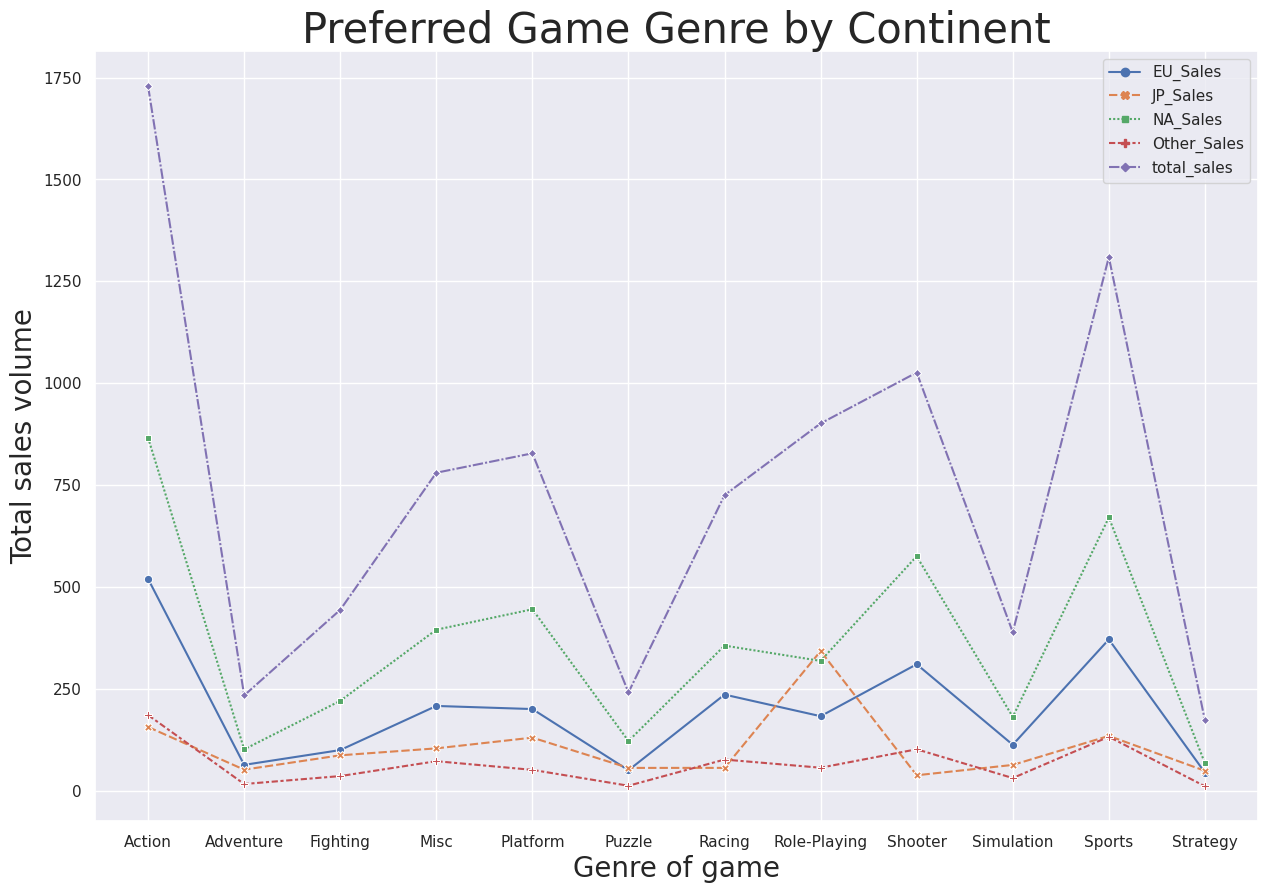

In [141]:
# 질문 1 : 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
# 지역에 따른 게임 장르 그래프 

df_genre = df1.groupby(by=['Genre'])['total_sales'].sum() # 전 대륙 선호하는 게임 장르
df_genre = df_genre.reset_index()

df_genre_na = df1.groupby(by=['Genre'])['NA_Sales'].sum() # 북미 선호하는 게임 장르
df_genre_na = df_genre_na.reset_index()

df_genre_eu = df1.groupby(by=['Genre'])['EU_Sales'].sum() # 유럽 선호하는 게임 장르
df_genre_eu = df_genre_eu.reset_index()

df_genre_jp = df1.groupby(by=['Genre'])['JP_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_jp = df_genre_jp.reset_index()

df_genre_ot = df1.groupby(by=['Genre'])['Other_Sales'].sum() # 일본 선호하는 게임 장르
df_genre_ot = df_genre_ot.reset_index()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_ot)
df_genre = df_genre.set_index("Genre")

sns.set(style='darkgrid')
plt.figure(figsize=(15, 10))
plt.title("Preferred Game Genre by Continent", fontsize=30)
plt.xlabel("Genre of game", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

sns.lineplot(data=df_genre, markers=True)

NA(북미)에서는 Action 게임 장르가 제일 인기가 많고, 그 다음으로는 Sports 게임이 인기가 많다.

EU(유럽) 또한 Action 다음 Sports 순으로 같다.

JP(일본)에서는 Role-playing 게임이 압도적으로 인기가 많고, 그 다음으로는 action 장르가 인기가 많은 것을 확인 할 수 있다.

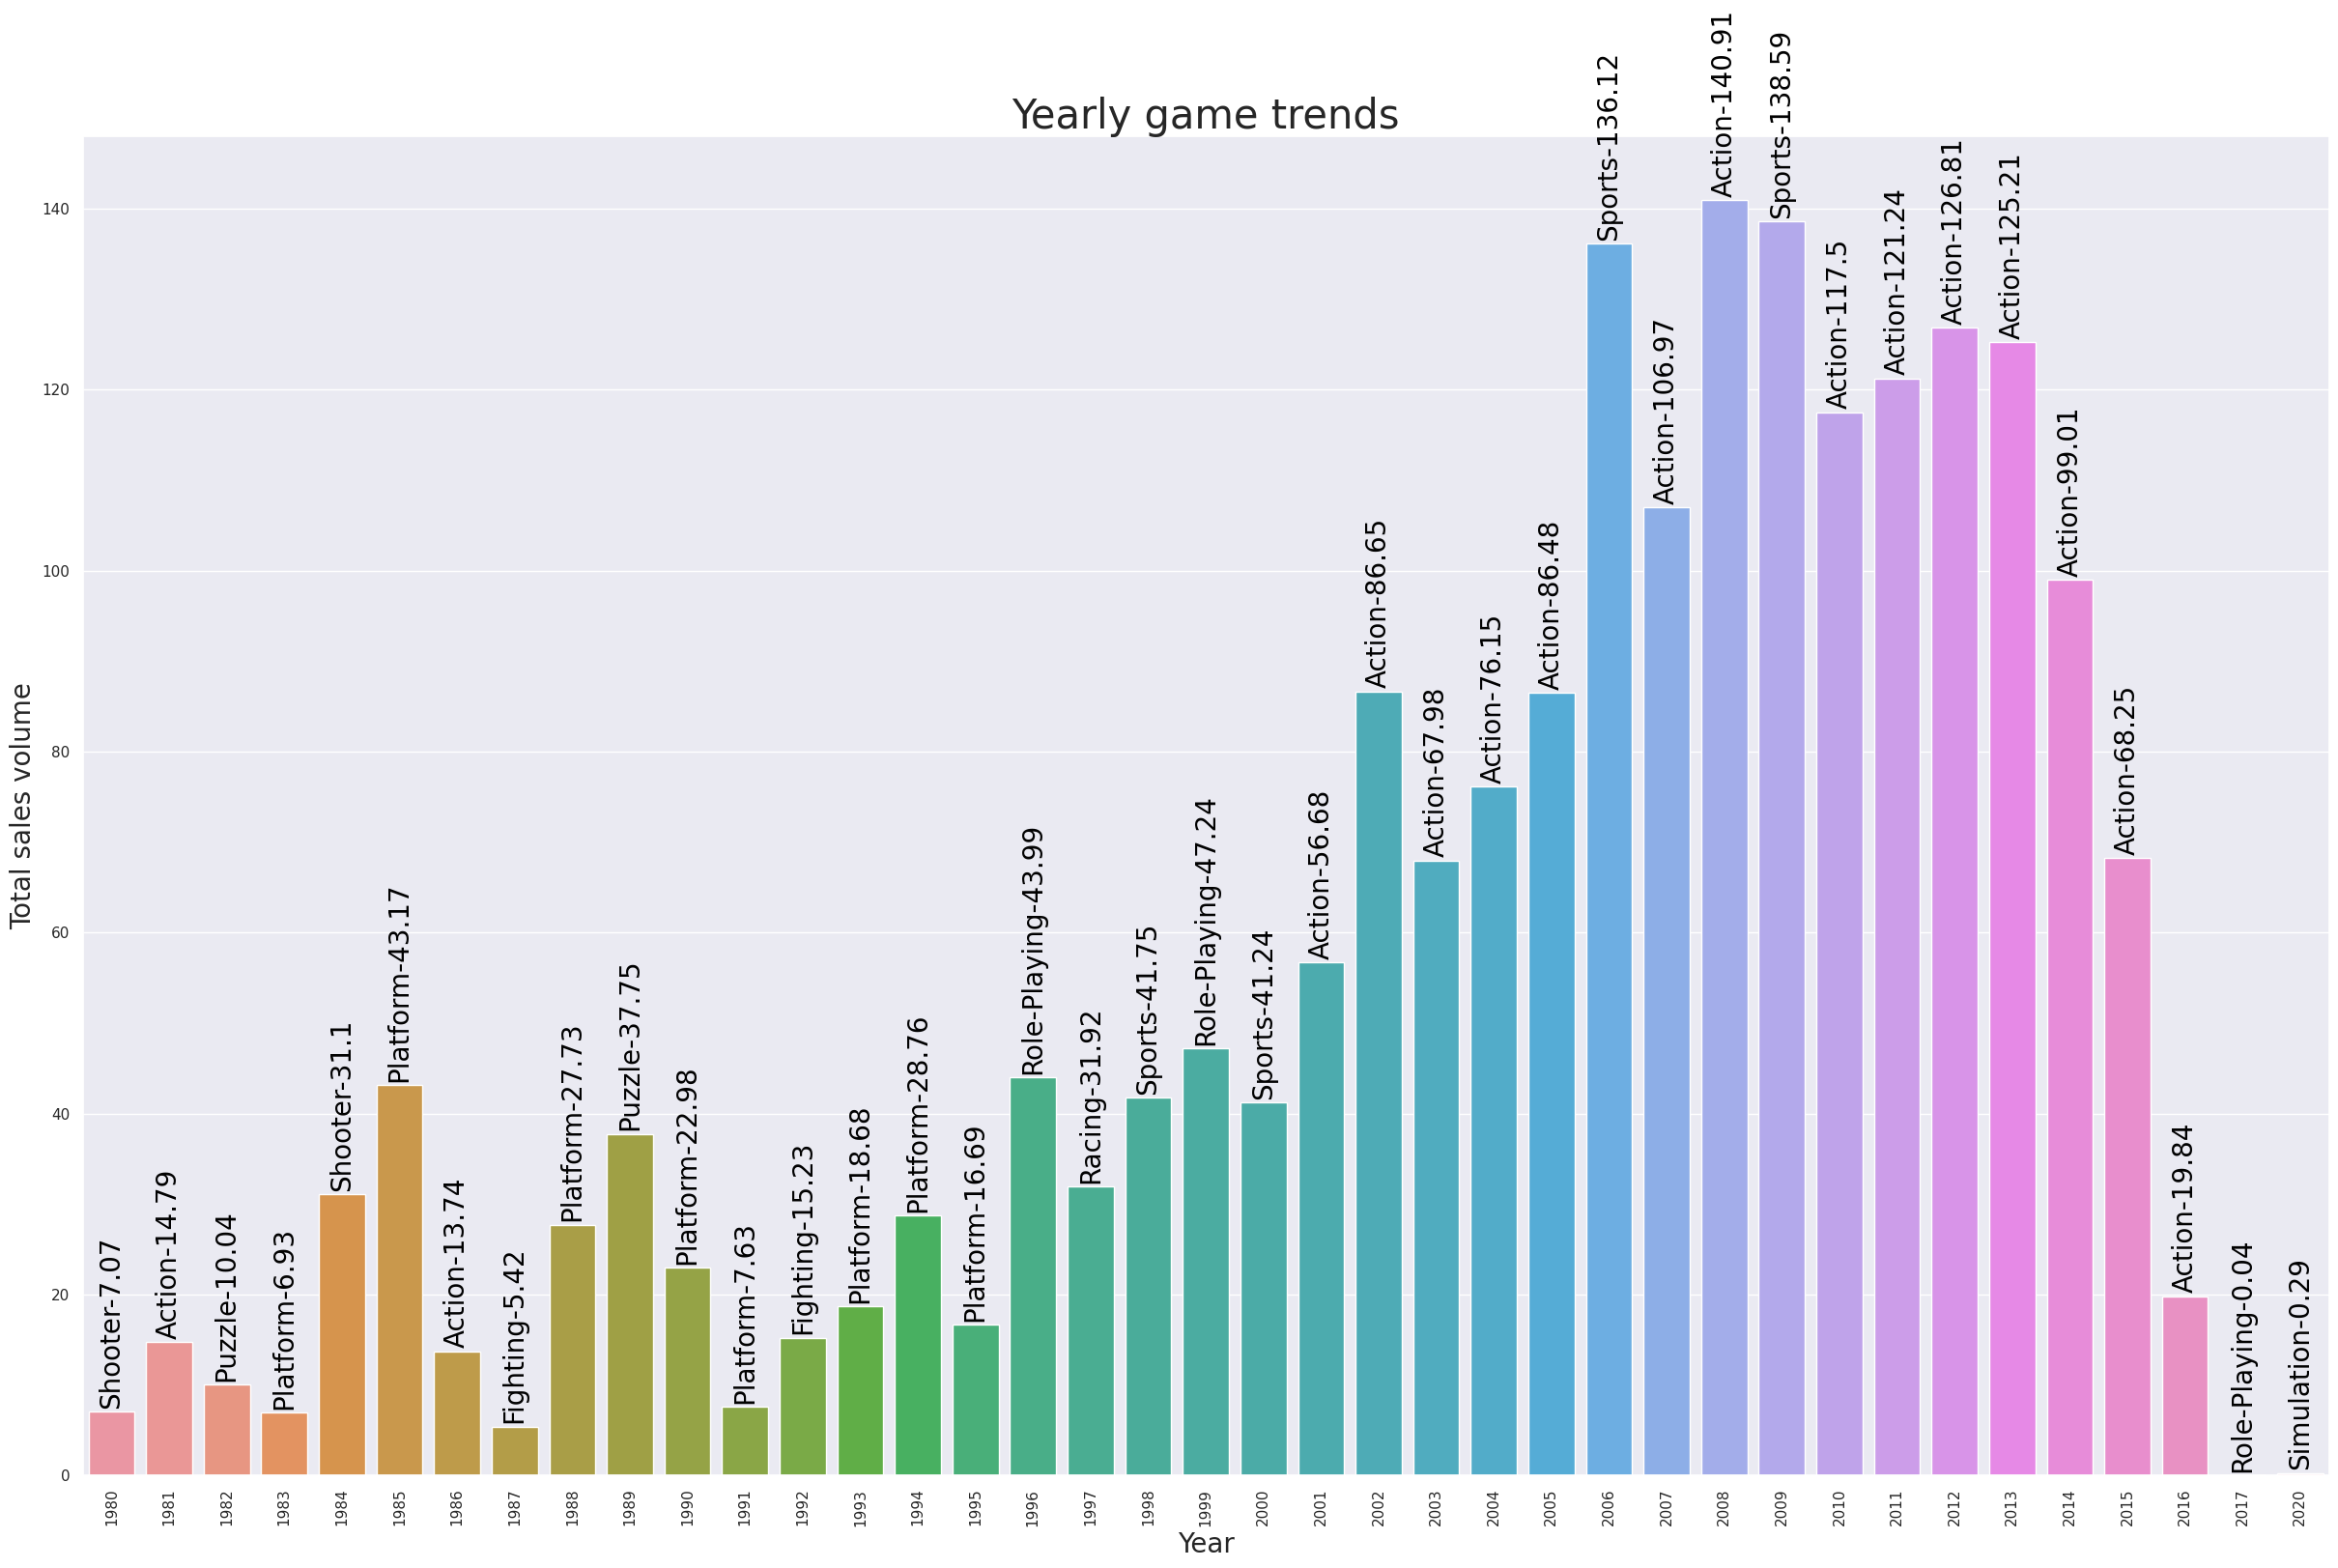

In [142]:
# 질문2 : 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
# 연도별 게임 장르 그래프
year_sale_dx = df1.groupby(by=['Year', 'Genre'])['total_sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['total_sales'].transform(max) == year_sale_dx['total_sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

genre = year_sale_max['Genre']

plt.figure(figsize=(30, 18))
g = sns.barplot(x='Year', y='total_sales', data=year_sale_max)
index = 0
for value in year_sale_max['total_sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=20, rotation= 90, ha="center")
    index += 1

plt.title("Yearly game trends", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=90)
plt.show()

2000년대 이전에는 단순한 shooting, puzzle, platform 게임을 주로 이용하였으며,

2000년대 이후, 컴퓨터가 많이 발전하면서 다양한 action 게임이 트렌드로 자리 잡았다.

2006년부터는 sport 게임을 압도적으로 많이 이용하며 sports와 action이 트렌드로 자리 잡았다.

In [150]:
# 질문 3 : 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.
# 높은 출고량 순 정렬
max_total = df1.sort_values(by=['total_sales'], axis=0, ascending=False)  # 내림차순 정렬
max_total

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
2861,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4127,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12360,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3296,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7698,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
4536,Strider (2014),PS3,2014,Platform,Capcom,0.00,0.00,0.01,0.00,0.01
4529,Barbie and Her Sisters Puppy Rescue,PS3,2015,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
9383,RalliSport Challenge(JP sales),XB,2002,Racing,Microsoft Game Studios,0.00,0.00,0.01,0.00,0.01
14833,Pro Evolution Soccer 2008,PC,2007,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01


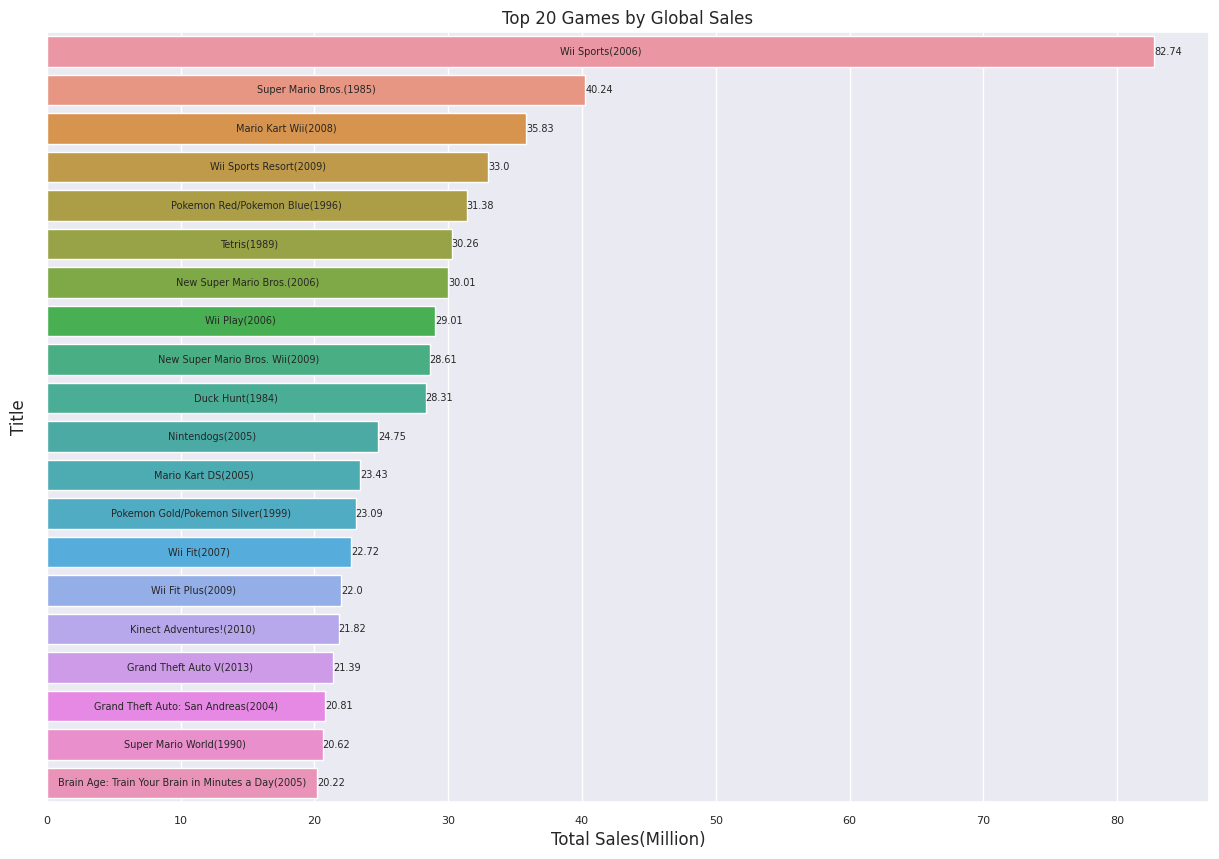

In [172]:
# top 20 games by global sales
df_top_games = df1.sort_values(by="total_sales", ascending=False)[:20].reset_index(drop=True)

plt.figure(figsize=(15, 10))
df_top_games["Year"] = df_top_games.Year.astype(str)
df_top_games["Platform"] = df_top_games.Platform.astype(str)
ax = sns.barplot(data=df_top_games, y="Name", x="total_sales")
ax.set_title("Top 20 Games by Global Sales")
ax.set_ylabel("Title", fontsize=12)
ax.set_xlabel("Total Sales(Million)", fontsize=12)

for i, row in df_top_games.iterrows():
  ax.text(x=row.total_sales/2, y=i, s=row.Name+"("+row.Year+")", fontsize=7, ha="center", va="center")
  ax.text(x=row.total_sales, y=i, s=row.total_sales.__round__(2), fontsize=7, ha="left", va="center")

plt.xticks(fontsize=8)
ax.set_yticklabels([""]*len(df_top_games));

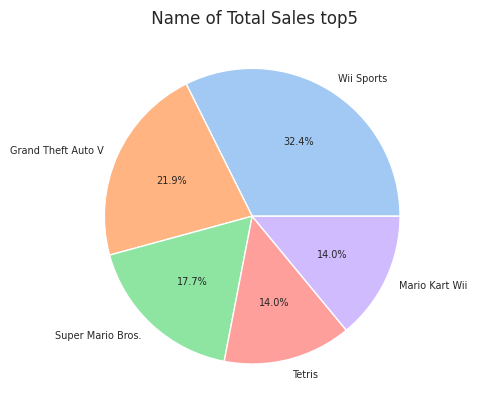

In [156]:
# 출고량 높은 게임 top5 - 파이 차트 그리기

name_top5 = df1.groupby(['Name'])['total_sales'].sum().sort_values(ascending=False)[:5]
plt.title(" Name of Total Sales top5")
plt.pie(name_top5, labels=name_top5.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7})

total sales를 기준으로 가장 출고량이 높은 게임은 Wii Sports이고, 2순위가 Grand Theft Auto V, 3순위가 Super Mario Bros.이다. 장르별로 다양하게 결과가 나온 것을 확인할 수 있다.

([<matplotlib.patches.Wedge at 0x7f37eb37f950>,
 [Text(0.7745878691378822, 0.7810336951658585, 'PS2'),
  Text(-0.6525099647889487, 0.8855680356986271, 'X360'),
  Text(-1.0495208071528734, -0.3294026037437791, 'PS3'),
  Text(-0.07607118554542294, -1.0973664723918413, 'Wii'),
  Text(0.9502760296238385, -0.5540536684495049, 'DS')],
 [Text(0.42250247407520847, 0.4260183791813773, '25.1%'),
  Text(-0.3559145262485175, 0.4830371103810693, '19.9%'),
  Text(-0.5724658948106582, -0.1796741474966068, '19.5%'),
  Text(-0.04149337393386706, -0.5985635303955498, '18.6%'),
  Text(0.5183323797948209, -0.30221109188154804, '16.8%')])

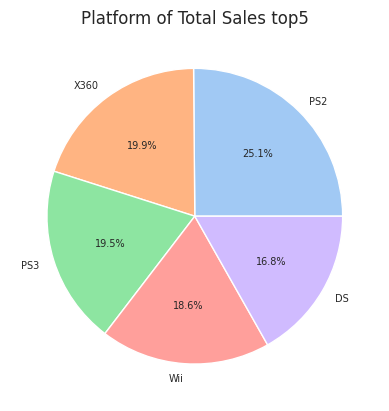

In [173]:
# 출고량 높은 게임 top5-플랫폼 그래프

plat_top5 = df1.groupby(['Platform'])['total_sales'].sum().sort_values(ascending=False)[:5]
plt.title("Platform of Total Sales top5")
plt.pie(plat_top5, labels=plat_top5.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7})

total sales를 기준으로 가장 출고량이 높은 게임의 Platform은 PS2이고, 2순위는 X360, 3순위는 PS3이다. PS2와 PS3는 같은 플랫폼이자 시리즈만 다른 것으로 PS가 약 44.6%로 많은 비중을 차지한다고 볼 수 있다. 또한 Wii와 DS도 Nintendo 회사에서 나온 것이므로 Nintendo 회사에서 출시한 플랫폼이 35.4%를 차지한다.

([<matplotlib.patches.Wedge at 0x7f37eb0e6150>,
 [Text(0.651140501915243, 0.8865754602771078, 'Action'),
  Text(-0.9337791010466862, 0.5814263413782034, 'Sports'),
  Text(-0.8345201643086275, -0.7166422366580841, 'Shooter'),
  Text(0.20125396651973412, -1.0814327722794763, 'Role-Playing'),
  Text(0.9909700760268672, -0.4774707409038854, 'Platform')],
 [Text(0.35516754649922344, 0.4835866146966042, '29.8%'),
  Text(-0.5093340551163742, 0.3171416407517472, '22.6%'),
  Text(-0.45519281689561497, -0.39089576544986404, '17.7%'),
  Text(0.10977489082894587, -0.5898724212433507, '15.6%'),
  Text(0.5405291323782911, -0.26043858594757385, '14.3%')])

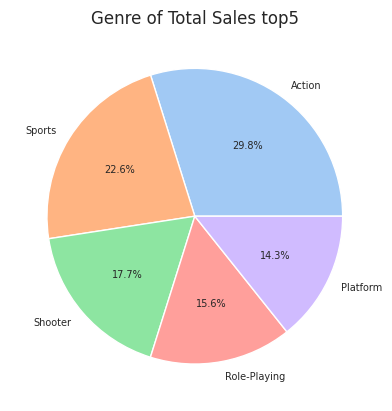

In [176]:
# 출고량 높은 게임 top5-장르 그래프
genre_top5 = df1.groupby(['Genre'])['total_sales'].sum().sort_values(ascending=False)[:5]
plt.title("Genre of Total Sales top5")
plt.pie(genre_top5, labels=genre_top5.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7})

장르는 Action, Sports, Shooter 순으로 위의 장르별 트렌드 그래프와 비슷한 것을 확인할 수 있다.

([<matplotlib.patches.Wedge at 0x7f37eb27fb10>,
 [Text(0.8424236937088044, 0.7073346593218904, '2008'),
  Text(-0.5349082940062557, 0.9611831859761787, '2009'),
  Text(-1.067682110724041, -0.2646788817413602, '2007'),
  Text(-0.10612988990689529, -1.0948682324683416, '2010'),
  Text(0.9489451903196284, -0.5563299612363549, '2011')],
 [Text(0.4595038329320751, 0.3858189050846675, '22.2%'),
  Text(-0.2917681603670485, 0.5242817378051884, '21.7%'),
  Text(-0.5823720603949314, -0.14437029913165098, '19.9%'),
  Text(-0.05788903085830651, -0.5972008540736409, '19.3%'),
  Text(0.5176064674470701, -0.30345270612892083, '16.9%')])

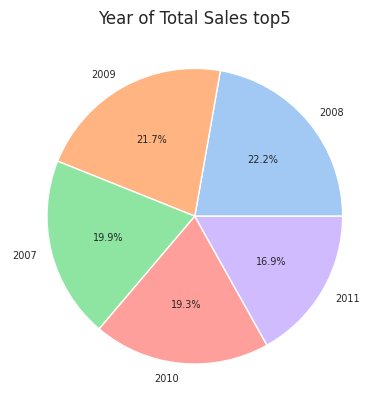

In [177]:
# 출고량 높은 게임 top5-연도 그래프
year_top5 = df1.groupby(['Year'])['total_sales'].sum().sort_values(ascending=False)[:5]
plt.title("Year of Total Sales top5")
plt.pie(year_top5, labels=year_top5.index, autopct="%.1f%%", colors=sns.color_palette('pastel'), textprops={'fontsize': 7})

게임의 출고량이 높았던 시기는 2008, 2009, 2007, 2010, 2011 순으로 컴퓨터가 대중적으로 보급이 되고, 인터넷이 급속도로 발전했던 시기에 게임량이 증가했음을 확인할 수 있다.